<a href="https://colab.research.google.com/github/DhirajBembade/AGC/blob/main/SGD_with_momentum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# objective function : one-dimensional function that squares the input and
# defines the range of valid inputs from -1.0 to 1.0. y = square(x)
def objective(x):
	return x**2.0

In [ ]:
# sample all inputs in the range and calculate the objective function value for each.
# define range for input
import numpy as np
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = np.arange(r_min, r_max+0.1, 0.1)
# compute targets
print(inputs)
results = objective(inputs)
print(' ')
print(results)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00]
 
[1.00000000e+00 8.10000000e-01 6.40000000e-01 4.90000000e-01
 3.60000000e-01 2.50000000e-01 1.60000000e-01 9.00000000e-02
 4.00000000e-02 1.00000000e-02 4.93038066e-32 1.00000000e-02
 4.00000000e-02 9.00000000e-02 1.60000000e-01 2.50000000e-01
 3.60000000e-01 4.90000000e-01 6.40000000e-01 8.10000000e-01
 1.00000000e+00]


create a line plot of the inputs (x-axis) versus the objective function values (y-axis) to get an intuition for the shape of the objective function that we will be searching

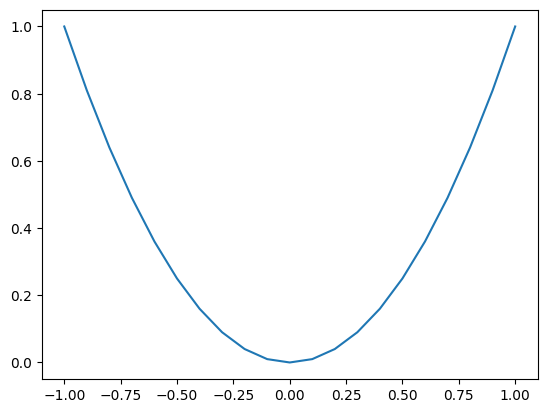

In [ ]:
# create a line plot of input vs result
import matplotlib.pyplot as plt
plt.plot(inputs, results)
# show the plot
plt.show()

Gradient Descent Optimization
Next, we can apply the gradient descent algorithm to the problem.

First, we need a function that calculates the derivative for the objective function.

The derivative of x^2 is x * 2 and the derivative() function implements this below.

In [ ]:
# derivative of objective function
def derivative(x):
	return x * 2.0

define a function that implements the gradient descent optimization algorithm.

The procedure involves starting with a randomly selected point in the search space, then calculating the gradient, updating the position in the search space, evaluating the new position, and reporting the progress. This process is then repeated for a fixed number of iterations. The final point and its evaluation are then returned from the function.

The function gradient_descent() below implements this and takes the name of the objective and gradient functions as well as the bounds on the inputs to the objective function, number of iterations, and step size, then returns the solution and its evaluation at the end of the search.

In [ ]:
import random
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# generate an initial point
	solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step, assuming LR = 1
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval]

We can then define the bounds of the objective function, the step size, and the number of iterations for the algorithm.

We will use a step size of 0.1 and 30 iterations, both found after a little experimentation.

The seed for the pseudorandom number generator is fixed so that we always get the same sequence of random numbers, and in this case, it ensures that we get the same starting point for the search each time the code is run (e.g. something interesting far from the optima).

In [ ]:
# run the GD Algo
# seed the pseudo random number generator
import random as rd
rd.seed(4)
# define range for input
bounds = np.asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.21878297]) = 0.04787
>1 f([-0.17502638]) = 0.03063
>2 f([-0.1400211]) = 0.01961
>3 f([-0.11201688]) = 0.01255
>4 f([-0.0896135]) = 0.00803
>5 f([-0.0716908]) = 0.00514
>6 f([-0.05735264]) = 0.00329
>7 f([-0.04588211]) = 0.00211
>8 f([-0.03670569]) = 0.00135
>9 f([-0.02936455]) = 0.00086
>10 f([-0.02349164]) = 0.00055
>11 f([-0.01879331]) = 0.00035
>12 f([-0.01503465]) = 0.00023
>13 f([-0.01202772]) = 0.00014
>14 f([-0.00962218]) = 0.00009
>15 f([-0.00769774]) = 0.00006
>16 f([-0.00615819]) = 0.00004
>17 f([-0.00492655]) = 0.00002
>18 f([-0.00394124]) = 0.00002
>19 f([-0.00315299]) = 0.00001
>20 f([-0.0025224]) = 0.00001
>21 f([-0.00201792]) = 0.00000
>22 f([-0.00161433]) = 0.00000
>23 f([-0.00129147]) = 0.00000
>24 f([-0.00103317]) = 0.00000
>25 f([-0.00082654]) = 0.00000
>26 f([-0.00066123]) = 0.00000
>27 f([-0.00052898]) = 0.00000
>28 f([-0.00042319]) = 0.00000
>29 f([-0.00033855]) = 0.00000
Done!
f([-0.00033855]) = 0.000000


<ipython-input-6-c1f475b903ce>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
<ipython-input-7-0ff9d4d75846>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('f(%s) = %f' % (best, score))


In [ ]:
# Visualization of Gradient Descent Optimization
# update the gradient_descent() function to store all solutions and their score
# found during the optimization as lists and return them at the end of the
# search instead of the best solution found.
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]


In [ ]:
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)

>0 f([-0.72447497]) = 0.52486
>1 f([-0.57957998]) = 0.33591
>2 f([-0.46366398]) = 0.21498
>3 f([-0.37093119]) = 0.13759
>4 f([-0.29674495]) = 0.08806
>5 f([-0.23739596]) = 0.05636
>6 f([-0.18991677]) = 0.03607
>7 f([-0.15193341]) = 0.02308
>8 f([-0.12154673]) = 0.01477
>9 f([-0.09723738]) = 0.00946
>10 f([-0.07778991]) = 0.00605
>11 f([-0.06223193]) = 0.00387
>12 f([-0.04978554]) = 0.00248
>13 f([-0.03982843]) = 0.00159
>14 f([-0.03186275]) = 0.00102
>15 f([-0.0254902]) = 0.00065
>16 f([-0.02039216]) = 0.00042
>17 f([-0.01631373]) = 0.00027
>18 f([-0.01305098]) = 0.00017
>19 f([-0.01044078]) = 0.00011
>20 f([-0.00835263]) = 0.00007
>21 f([-0.0066821]) = 0.00004
>22 f([-0.00534568]) = 0.00003
>23 f([-0.00427655]) = 0.00002
>24 f([-0.00342124]) = 0.00001
>25 f([-0.00273699]) = 0.00001
>26 f([-0.00218959]) = 0.00000
>27 f([-0.00175167]) = 0.00000
>28 f([-0.00140134]) = 0.00000
>29 f([-0.00112107]) = 0.00000


<ipython-input-11-93171fe3dc6b>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


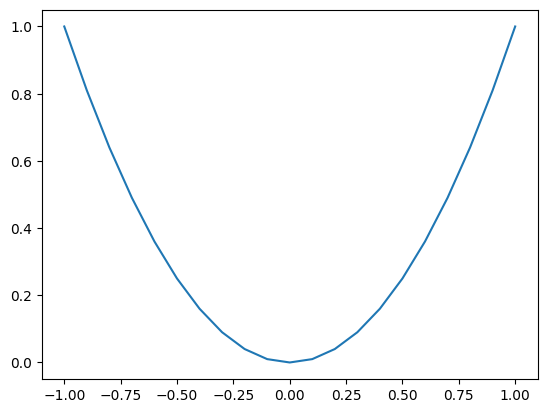

In [ ]:
# create a line plot of the objective function
import matplotlib.pyplot as plt
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)

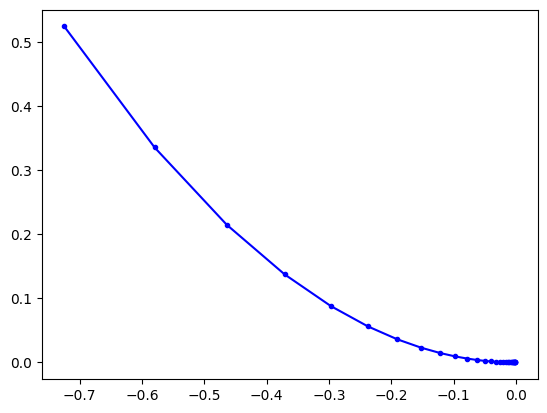

In [ ]:
# plot each solution found as a red dot and connect the dots with a line so we
# can see how the search moved downhill

# plot the solutions found
plt.plot(solutions, scores, '.-', color='blue')

<ipython-input-23-11dc71c4eab2>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


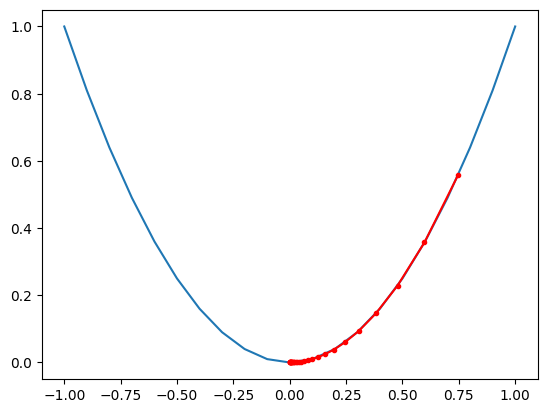

In [ ]:
# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# objective function
def objective(x):
	return x**2.0

# derivative of objective function
def derivative(x):
	return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = np.asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(solutions, scores, '.-', color='red')
# show the plot
plt.show()

Gradient Descent Optimization With Momentum
update the gradient_descent() function to take a “momentum” argument that defines the amount of momentum used during the search.
The change made to the solution must be remembered from the previous iteration of the loop, with an initial value of 0.0

In [ ]:
# keep track of the change
change = 0.0

break the update procedure down into first calculating the gradient, then calculating the change to the solution, calculating the position of the new solution, then saving the change for the next iteration.

In [ ]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# generate an initial point
	solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval]

In [ ]:
#choose a momentum value and pass it to the gradient_descent() function
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)

>0 f([0.33509419]) = 0.11229
>1 f([0.24294329]) = 0.05902
>2 f([0.16670936]) = 0.02779
>3 f([0.11049731]) = 0.01221
>4 f([0.07153423]) = 0.00512
>5 f([0.04553846]) = 0.00207
>6 f([0.02863204]) = 0.00082
>7 f([0.0178337]) = 0.00032
>8 f([0.01102746]) = 0.00012
>9 f([0.0067801]) = 0.00005
>10 f([0.00414987]) = 0.00002
>11 f([0.00253083]) = 0.00001
>12 f([0.00153895]) = 0.00000
>13 f([0.0009336]) = 0.00000
>14 f([0.00056527]) = 0.00000
>15 f([0.00034172]) = 0.00000
>16 f([0.00020631]) = 0.00000
>17 f([0.00012442]) = 0.00000
>18 f([7.49744872e-05]) = 0.00000
>19 f([4.51444777e-05]) = 0.00000
>20 f([2.71665793e-05]) = 0.00000
>21 f([1.63398939e-05]) = 0.00000
>22 f([9.82390952e-06]) = 0.00000
>23 f([5.9043323e-06]) = 0.00000
>24 f([3.54759267e-06]) = 0.00000
>25 f([2.13105225e-06]) = 0.00000
>26 f([1.27987967e-06]) = 0.00000
>27 f([7.68551965e-07]) = 0.00000
>28 f([4.6144326e-07]) = 0.00000
>29 f([2.77021996e-07]) = 0.00000


<ipython-input-16-1caffa6294dd>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


<ipython-input-18-85416c88996f>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


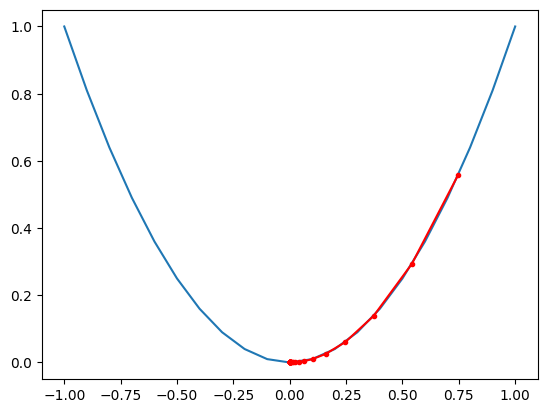

In [ ]:
# example of plotting gradient descent with momentum for a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# objective function
def objective(x):
	return x**2.0

# derivative of objective function
def derivative(x):
	return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

Gradient Descent With Nesterov Momentum : Two-Dimensional Test Problem,  bowl shape with the global minima at f(0, 0) = 0.

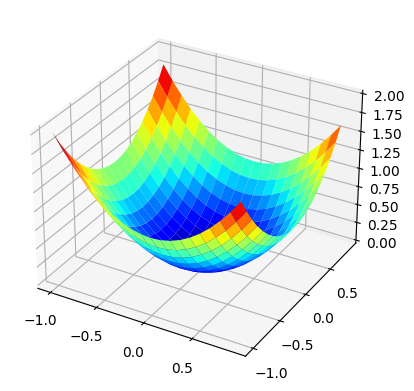

In [ ]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.add_subplot(projection='3d')
#axis = figure.gca()
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

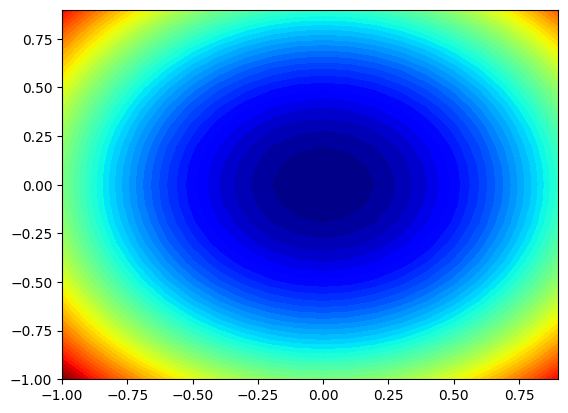

In [ ]:
# create a contour plot of the objective function
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

implement the Nesterov Momentum optimization algorithm.

we need a function that calculates the derivative for this function.

The derivative of x^2 is x * 2 in each dimension

# derivative of objective function
def derivative(x, y):
 return asarray([x * 2.0, y * 2.0])
Next, we can implement gradient descent optimization.

First, we can select a random point in the bounds of the problem as a starting point for the search.

This assumes we have an array that defines the bounds of the search with one row for each dimension and the first column defines the minimum and the second column defines the maximum of the dimension.

...
# generate an initial point
solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
Next, we need to calculate the projected point from the current position and calculate its derivative.

...
# calculate the projected solution
projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
# calculate the gradient for the projection
gradient = derivative(projected[0], projected[1])
We can then create the new solution, one variable at a time.

First, the change in the variable is calculated using the partial derivative and learning rate with the momentum from the last change in the variable. This change is stored for the next iteration of the algorithm. Then the change is used to calculate the new value for the variable.

...
# build a solution one variable at a time
new_solution = list()
for i in range(solution.shape[0]):
 # calculate the change
 change[i] = (momentum * change[i]) - step_size * gradient[i]
 # calculate the new position in this variable
 value = solution[i] + change[i]
 # store this variable
 new_solution.append(value)
This is repeated for each variable for the objective function, then repeated for each iteration of the algorithm.

This new solution can then be evaluated using the objective() function and the performance of the search can be reported.

...
# evaluate candidate point
solution = asarray(new_solution)
solution_eval = objective(solution[0], solution[1])
# report progress
print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
And that’s it.

We can tie all of this together into a function named nesterov() that takes the names of the objective function and the derivative function, an array with the bounds of the domain and hyperparameter values for the total number of algorithm iterations, the learning rate, and the momentum, and returns the final solution and its evaluation.

This complete function is listed below.

In [ ]:
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# evaluate candidate point
		solution = asarray(new_solution)
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return [solution, solution_eval]

In [ ]:
# define our hyperparameters and call the nesterov()
#function to optimize our test objective function.

#In this case, we will use 30 iterations of the algorithm with a learning rate
# of 0.1 and momentum of 0.3. These hyperparameter values were found after a
# little trial and error.

# putting code all together
# gradient descent optimization with nesterov momentum for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# evaluate candidate point
		solution = asarray(new_solution)
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return [solution, solution_eval]

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with nesterov momentum
best, score = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.13276479  0.35251919]) = 0.14190
>1 f([-0.09824595  0.2608642 ]) = 0.07770
>2 f([-0.07031223  0.18669416]) = 0.03980
>3 f([-0.0495457   0.13155452]) = 0.01976
>4 f([-0.03465259  0.0920101 ]) = 0.00967
>5 f([-0.02414772  0.06411742]) = 0.00469
>6 f([-0.01679701  0.04459969]) = 0.00227
>7 f([-0.01167344  0.0309955 ]) = 0.00110
>8 f([-0.00810909  0.02153139]) = 0.00053
>9 f([-0.00563183  0.01495373]) = 0.00026
>10 f([-0.00391092  0.01038434]) = 0.00012
>11 f([-0.00271572  0.00721082]) = 0.00006
>12 f([-0.00188573  0.00500701]) = 0.00003
>13 f([-0.00130938  0.0034767 ]) = 0.00001
>14 f([-0.00090918  0.00241408]) = 0.00001
>15 f([-0.0006313   0.00167624]) = 0.00000
>16 f([-0.00043835  0.00116391]) = 0.00000
>17 f([-0.00030437  0.00080817]) = 0.00000
>18 f([-0.00021134  0.00056116]) = 0.00000
>19 f([-0.00014675  0.00038964]) = 0.00000
>20 f([-0.00010189  0.00027055]) = 0.00000
>21 f([-7.07505806e-05  1.87858067e-04]) = 0.00000
>22 f([-4.91260884e-05  1.30440372e-04]) = 0.00000
>23 f

Visualization of Nesterov Momentum
We can plot the progress of the Nesterov Momentum search on a contour plot of the domain.

This can provide an intuition for the progress of the search over the iterations of the algorithm.

We must update the nesterov() function to maintain a list of all solutions found during the search, then return this list at the end of the search.

The updated version of the function with these changes is listed below.

In [ ]:
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of changes made to each variable
	change = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate the projected solution
		projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
		# calculate the gradient for the projection
		gradient = derivative(projected[0], projected[1])
		# build a solution one variable at a time
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the change
			change[i] = (momentum * change[i]) - step_size * gradient[i]
			# calculate the new position in this variable
			value = solution[i] + change[i]
			# store this variable
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

In [ ]:

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)

>0 f([-0.16263687  0.43183601]) = 0.21293
>1 f([-0.15678194  0.41628991]) = 0.19788
>2 f([-0.14905604  0.39577597]) = 0.17886
>3 f([-0.14001781  0.37177753]) = 0.15782
>4 f([-0.13013149  0.34552719]) = 0.13632
>5 f([-0.11977798  0.31803639]) = 0.11549
>6 f([-0.10926527  0.29012287]) = 0.09611
>7 f([-0.09883799  0.26243621]) = 0.07864
>8 f([-0.08868625  0.23548115]) = 0.06332
>9 f([-0.07895356  0.20963876]) = 0.05018
>10 f([-0.06974406  0.18518555]) = 0.03916
>11 f([-0.06112894  0.16231052]) = 0.03008
>12 f([-0.0531521   0.14113029]) = 0.02274
>13 f([-0.04583521  0.12170238]) = 0.01691
>14 f([-0.03918207  0.10403685]) = 0.01236
>15 f([-0.03318236  0.08810634]) = 0.00886
>16 f([-0.02781495  0.0738547 ]) = 0.00623
>17 f([-0.0230506   0.06120431]) = 0.00428
>18 f([-0.01885433  0.05006232]) = 0.00286
>19 f([-0.01518737  0.04032576]) = 0.00186
>20 f([-0.01200873  0.03188577]) = 0.00116
>21 f([-0.0092765   0.02463111]) = 0.00069
>22 f([-0.0069489   0.01845084]) = 0.00039
>23 f([-0.00498509  0

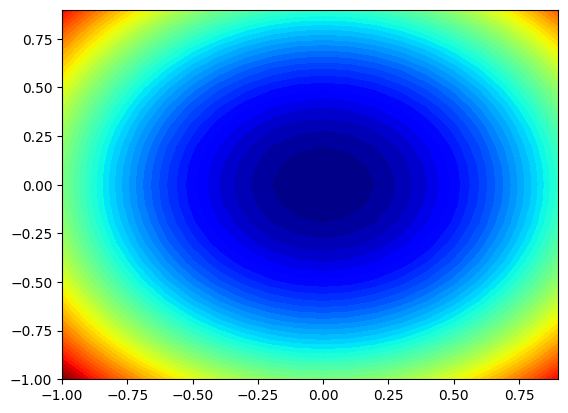

In [ ]:
# Contour plot
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')

>0 f([-0.97977583 -0.38742816]) = 1.11006
>1 f([-0.9445039  -0.37348074]) = 1.03158
>2 f([-0.89796062 -0.35507636]) = 0.93241
>3 f([-0.84351149 -0.33354579]) = 0.82276
>4 f([-0.78395314 -0.30999491]) = 0.71068
>5 f([-0.72158032 -0.28533112]) = 0.60209
>6 f([-0.65824843 -0.26028809]) = 0.50104
>7 f([-0.59543126 -0.23544859]) = 0.40997
>8 f([-0.53427397 -0.21126545]) = 0.33008
>9 f([-0.47564118 -0.18808056]) = 0.26161
>10 f([-0.42016025 -0.166142  ]) = 0.20414
>11 f([-0.36825999 -0.14561932]) = 0.15682
>12 f([-0.32020499 -0.12661716]) = 0.11856
>13 f([-0.27612577 -0.10918712]) = 0.08817
>14 f([-0.23604515 -0.09333822]) = 0.06443
>15 f([-0.19990103 -0.07904593]) = 0.04621
>16 f([-0.16756603 -0.06625985]) = 0.03247
>17 f([-0.13886406 -0.05491037]) = 0.02230
>18 f([-0.11358444 -0.04491416]) = 0.01492
>19 f([-0.09149353 -0.03617886]) = 0.00968
>20 f([-0.07234439 -0.0286068 ]) = 0.00605
>21 f([-0.05588457 -0.02209817]) = 0.00361
>22 f([-0.04186238 -0.01655344]) = 0.00203
>23 f([-0.03003174 -0

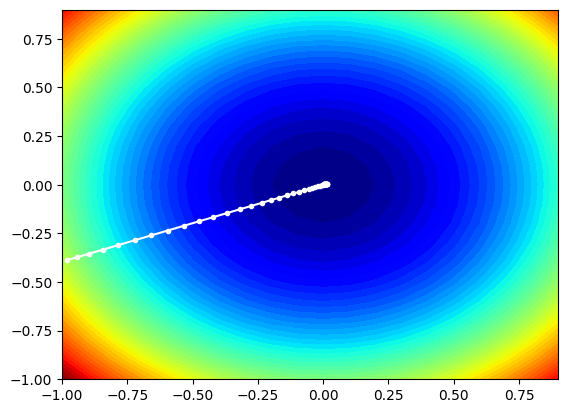

In [ ]:
# plot each solution found during the search as a white dot connected by a line

# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

we can see that a white dot is shown for each solution found during the search, starting above the optima and progressively getting closer to the optima at the center of the plot.

